In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from python.hamiltonian1D3B import Hamiltonian1D3B
from python.plot import AnimationWF

#sp.show_config()
#np.show_config()

gx = 10 * np.linspace(0, 1, 20) ** 2
gy = 50 * np.linspace(-1, 1, 20) ** 3


h = Hamiltonian1D3B(gx, gy)
print(h.eye.shape)

(1444, 1444)


In [2]:
evals, evecs = h.exp_hamiltonian(dt=1e-5, k=3, which='LM')
print(evals)

init


/home/alexey/anaconda2/envs/intelpy3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


[-0.64563223+0.j -0.63408884+0.j -0.61822461+0.j]


/home/alexey/Physics/project/python/hamiltonian1D3B.py:163: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:,i]=evecs[:,i]/math.sqrt(norm)


In [3]:
h.splinef(evecs[:, 1], 1.0, 0.0)

(nan+nanj)

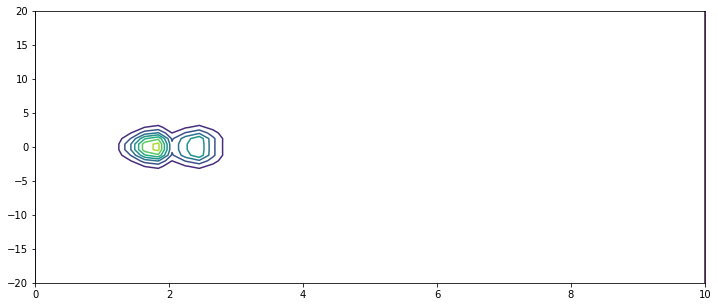

In [4]:
fig = plt.figure(figsize=(12,5))

x = np.linspace(0, 10, 50)
y = np.linspace(-20, 20, 50)
X, Y = np.meshgrid(x, y)

cvals = np.linspace(0, 1, 100)

psi = np.array([[h.splinef(evecs[:, 1], xi, yi) for xi in x] for yi in y])
psi_real = np.real(psi)
psi_imag = np.imag(psi)
psi_ampl = np.abs(psi)

contour1 = plt.contour(X, Y, psi_ampl, cvals=cvals)

In [5]:
evec, cache = h.evolution_step(evecs[:, 1], dt=1e-2, iters=10, debug=True)

[[ 0.00678951-5.02585809e-04j  0.0004191 -3.07581655e-05j
  -0.00181924+1.33727701e-04j ...  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.00181924-1.33727701e-04j  0.00322206-2.37833975e-04j
  -0.00678951+5.02585809e-04j ...  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.00322206-2.37928167e-04j
   0.00536602-3.98046108e-04j ...  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 ...
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j ... -0.11921632+1.57082243e-05j
   0.19854267-9.27942093e-05j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j ... -0.11921632+1.22231513e-05j
  -0.25121199+7.84198264e-05j  0.06731205+1.37586058e-05j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j ... -0.01550

In [6]:
def animate(i):
    global cache, contour1
    coefs = cache[i]
    psi = np.array([[h.splinef(coefs, xi, yi) for xi in x] for yi in y])
    psi_real = np.real(psi)
    psi_imag = np.imag(psi)
    psi_ampl = np.abs(psi)
    contour1 = plt.contour(X, Y, psi_real, cvals)
    return contour1,

(<matplotlib.contour.QuadContourSet at 0x7fd939c03370>,)

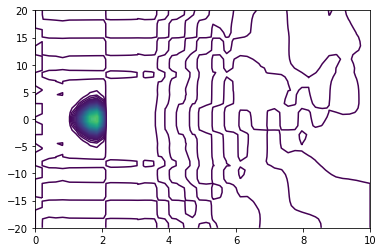

In [7]:
animate(1)

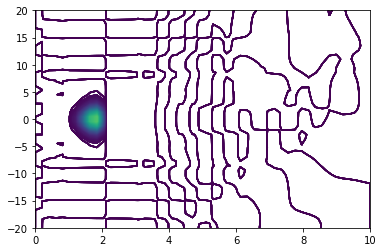

In [8]:
%matplotlib inline
from matplotlib import animation, rc

anim = animation.FuncAnimation(fig, animate, )

In [ ]:
from IPython.display import HTML
rc('animation', html='html5')
HTML(anim.to_html5_video())